This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [17]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [18]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('Behavioursinsight2.csv', skiprows=6)
Basecasenormal = pd.read_csv('Behavioursinsight2.csv', skiprows=6)
Basecasetest = pd.read_csv('Behavioursinsight2.csv', skiprows=6)
#ReboundA = pd.read_csv('ReboundA1.csv', skiprows=6)

In [19]:
# Rename two column names
Basecase.rename(columns={'[run number]':'run_number','[step]':'tick'}, inplace=True)
Basecasenormal.rename(columns={'[run number]':'run_number','[step]':'tick'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)

Basecasetest.rename(columns={'[run number]':'run_number','[step]':'tick'}, inplace=True)
Basecasetest.drop(Basecase[Basecase['tick'] > 1000].index, inplace = True)

In [20]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)


Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-15
Basecase[0:100]

,run_number,Value-of-price-modification,Social-influence,Disposal-feedback?,Number-consumers,Social-influence-radius,Lifetime-decrease-reuse,Scenario?,Random-seed?,Model-scale,...,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,year1,year
42350,3,0,0.5,True,50,10,30,True,False,0.1,...,3.309065,35.143197,18.634467,1.088205,8.102564,202.6,15.8,179.2,15.000000,0.000000
42356,3,0,0.5,True,50,10,30,True,False,0.1,...,3.307787,35.150128,18.619390,1.088205,8.102564,202.6,15.8,179.2,15.002740,0.002740
42362,8,0,0.5,True,50,10,30,True,False,0.1,...,3.476471,34.434719,19.991542,1.089212,8.506224,201.2,16.4,176.4,15.000000,0.000000
42363,3,0,0.5,True,50,10,30,True,False,0.1,...,3.310526,35.143694,18.634774,1.088205,8.102564,202.6,15.8,179.2,15.005479,0.005479
42370,8,0,0.5,True,50,10,30,True,False,0.1,...,3.479210,34.428415,20.007102,1.089212,8.506224,201.2,16.4,176.4,15.002740,0.002740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42666,8,0,0.5,True,50,10,30,True,False,0.1,...,3.495331,34.482545,20.007330,1.091282,8.717949,203.6,17.0,178.0,15.109589,0.109589
42667,6,0,0.5,True,50,10,30,True,False,0.1,...,3.396870,35.966569,18.771292,1.091699,8.108108,215.2,16.8,190.4,15.035616,0.035616
42668,3,0,0.5,True,50,10,30,True,False,0.1,...,3.260890,35.252817,18.349340,1.083930,7.778915,203.2,15.2,180.2,15.115068,0.115068
42674,6,0,0.5,True,50,10,30,True,False,0.1,...,3.399610,35.960000,18.785577,1.091699,8.108108,215.2,16.8,190.4,15.038356,0.038356


In [21]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

In [22]:
Basecase['year'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 42350       0.000000
42356       0.002740
42362       0.000000
42363       0.005479
42370       0.002740
             ...    
1829995    85.260274
1829996    85.263014
1829997    85.265753
1829998    85.268493
1829999    85.271233
Name: year, Length: 1556250, dtype: float64>

In [23]:
Basecase['service-lifespan'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 42350      3.309065
42356      3.307787
42362      3.476471
42363      3.310526
42370      3.479210
             ...   
1829995    3.404668
1829996    3.404137
1829997    3.406877
1829998    3.406347
1829999    3.405821
Name: service-lifespan, Length: 1556250, dtype: float64>

In [24]:
Basecase['wears'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 42350      18.634467
42356      18.619390
42362      19.991542
42363      18.634774
42370      20.007102
             ...    
1829995    18.116154
1829996    18.113160
1829997    18.127570
1829998    18.124568
1829999    18.121572
Name: wears, Length: 1556250, dtype: float64>

In [25]:
Basecasenormal['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
              ...    
1829995    100.260274
1829996    100.263014
1829997    100.265753
1829998    100.268493
1829999    100.271233
Name: year, Length: 1830000, dtype: float64>

In [26]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
#dataframe_short = myDataframe[myDataframe['year'].isin(check)]
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

# Short database

In [27]:
Basecase_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 42350       0.0
42362       0.0
42559       0.0
43155       0.0
43358       0.0
           ... 
1828440    81.0
1828805    82.0
1829170    83.0
1829535    84.0
1829900    85.0
Name: year, Length: 4300, dtype: float64>

In [28]:
Basecasenormal_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1828075     95.0
1828440     96.0
1828805     97.0
1829170     98.0
1829900    100.0
Name: year, Length: 5000, dtype: float64>

Text(0.5, 1.0, 'Percentage reused textiles Basecase')

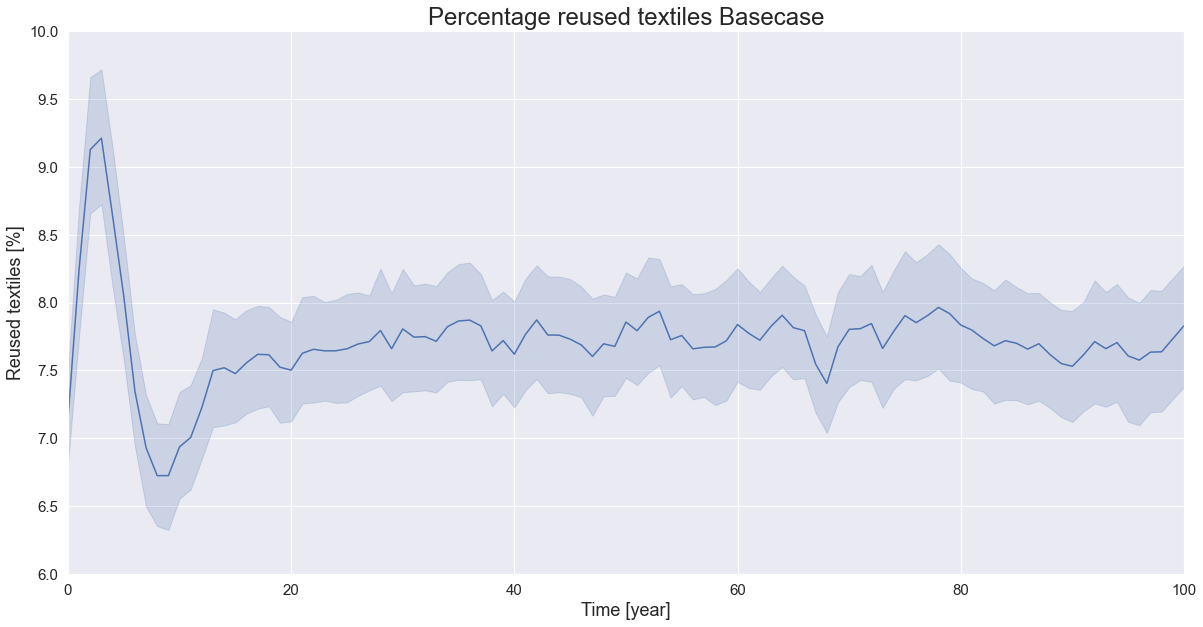

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'reused-textiles-percentage', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Reused textiles [%]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(6,10)
plt.title("Percentage reused textiles Basecase", fontsize = 24)

Text(0.5, 1.0, 'New textile consumption Basecase')

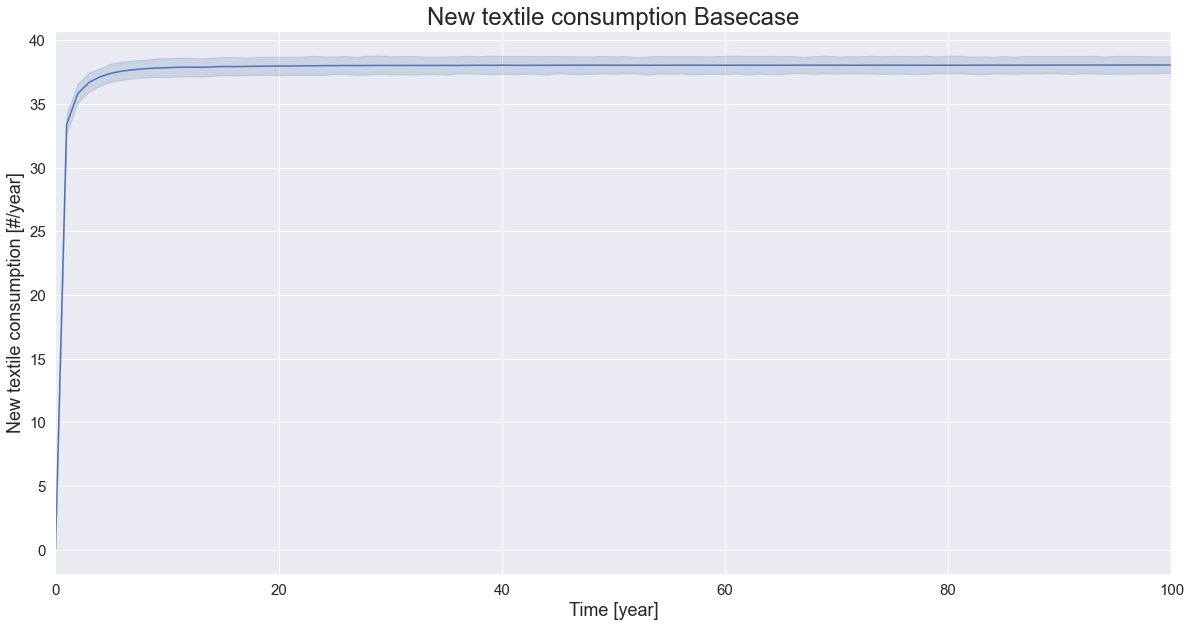

In [31]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'new-consumption', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("New textile consumption Basecase", fontsize = 24)

Text(0.5, 1.0, 'Textile service lifespan Basecase')

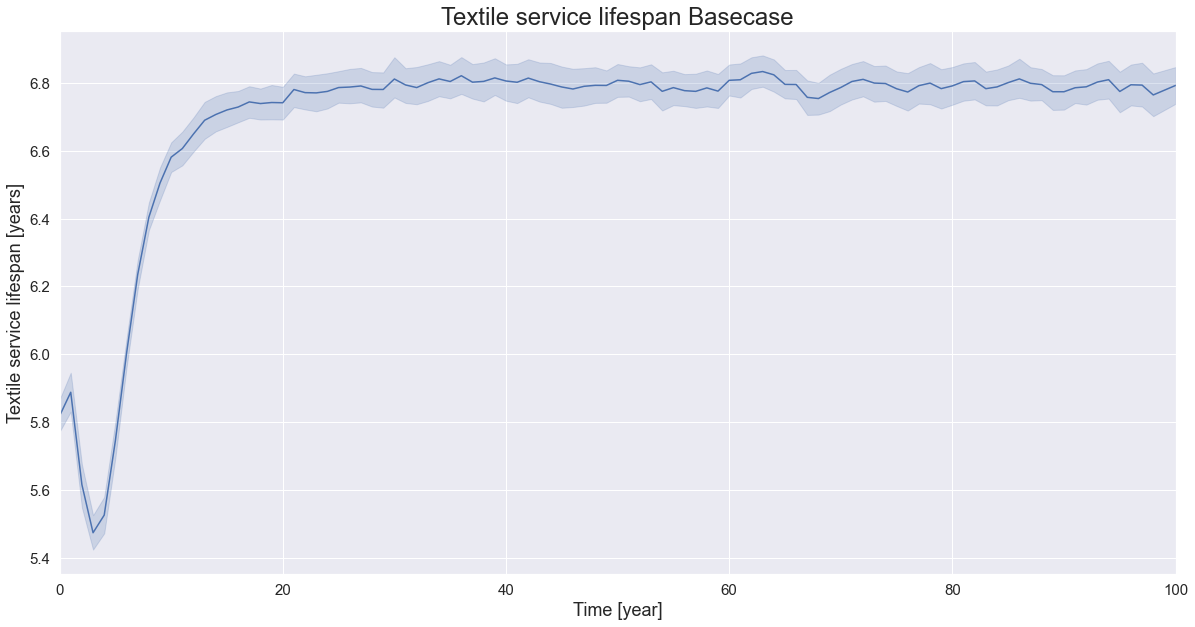

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'service-lifespan-1', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Textile service lifespan [years]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("Textile service lifespan Basecase", fontsize = 24)

Text(0.5, 1.0, 'Average number of owners Basecase')

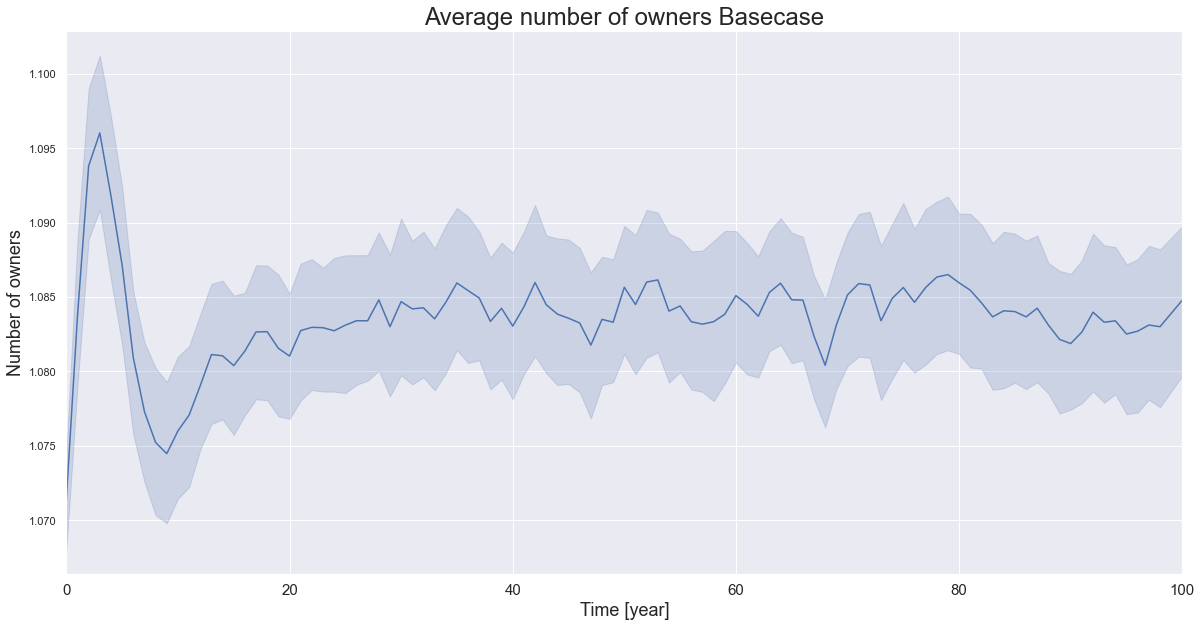

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'owners', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of owners", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(1.06,1.12)
plt.title("Average number of owners Basecase", fontsize = 24)

Text(0.5, 1.0, 'Number of textile wears Basecase')

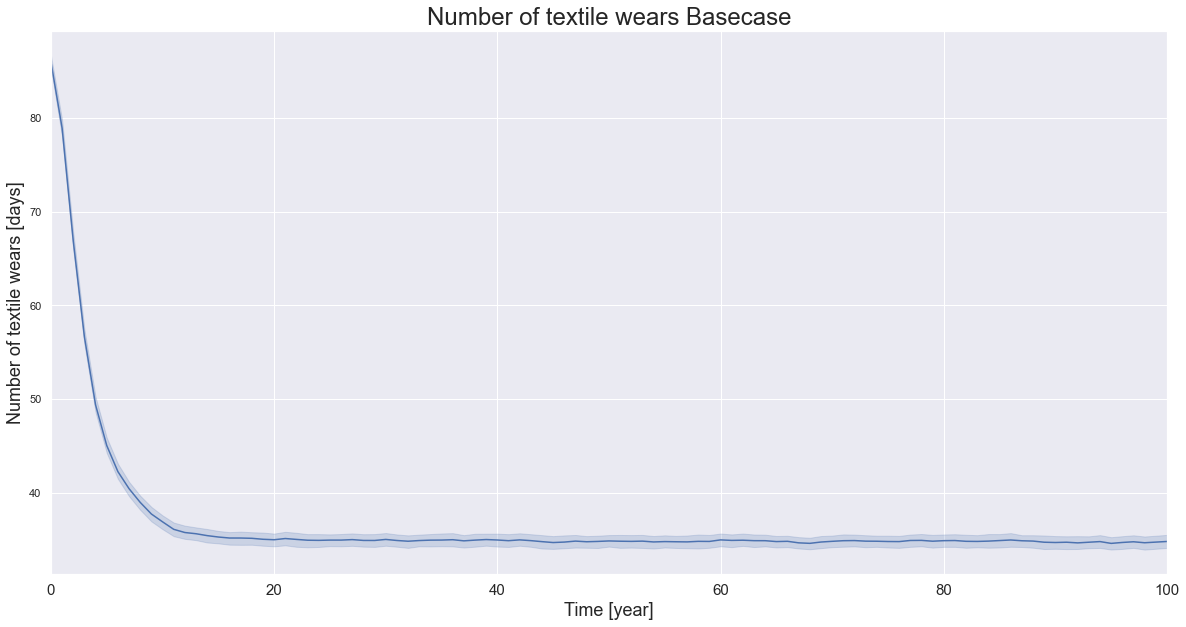

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'wears-1', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of textile wears [days]", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(1.06,1.12)
plt.title("Number of textile wears Basecase", fontsize = 24)

# Figures not shortend

Text(0.5, 1.0, 'Percentage reused textiles Basecase')

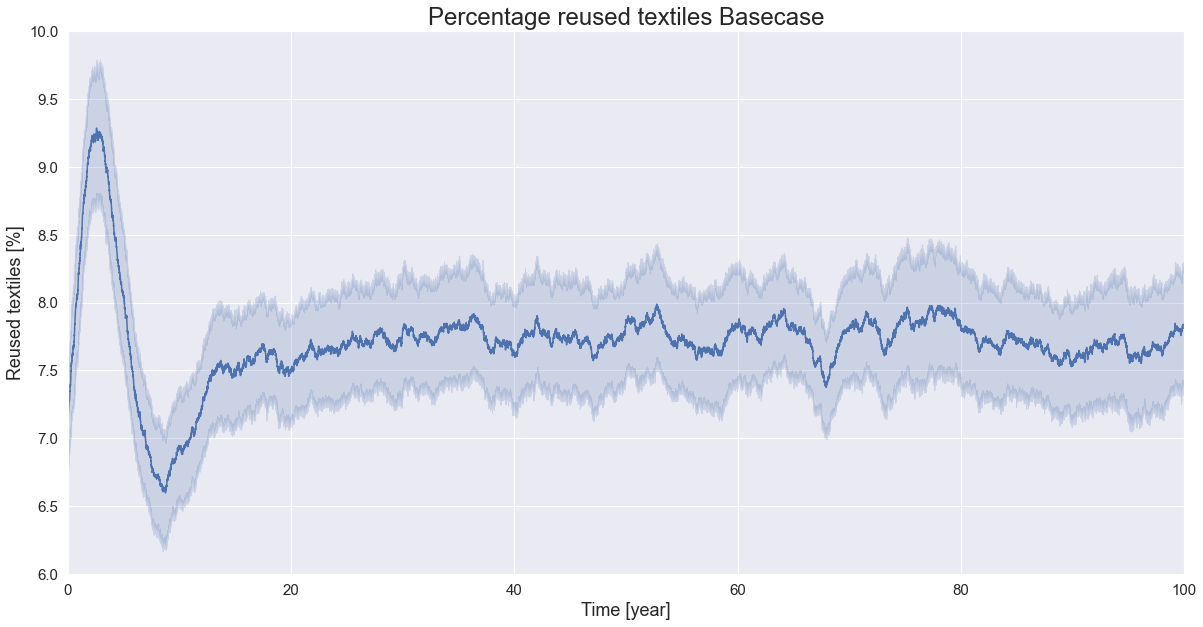

In [30]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'reused-textiles-percentage', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Reused textiles [%]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(6,10)
plt.title("Percentage reused textiles Basecase", fontsize = 24)

Text(0.5, 1.0, 'Textile service lifespan Basecase')

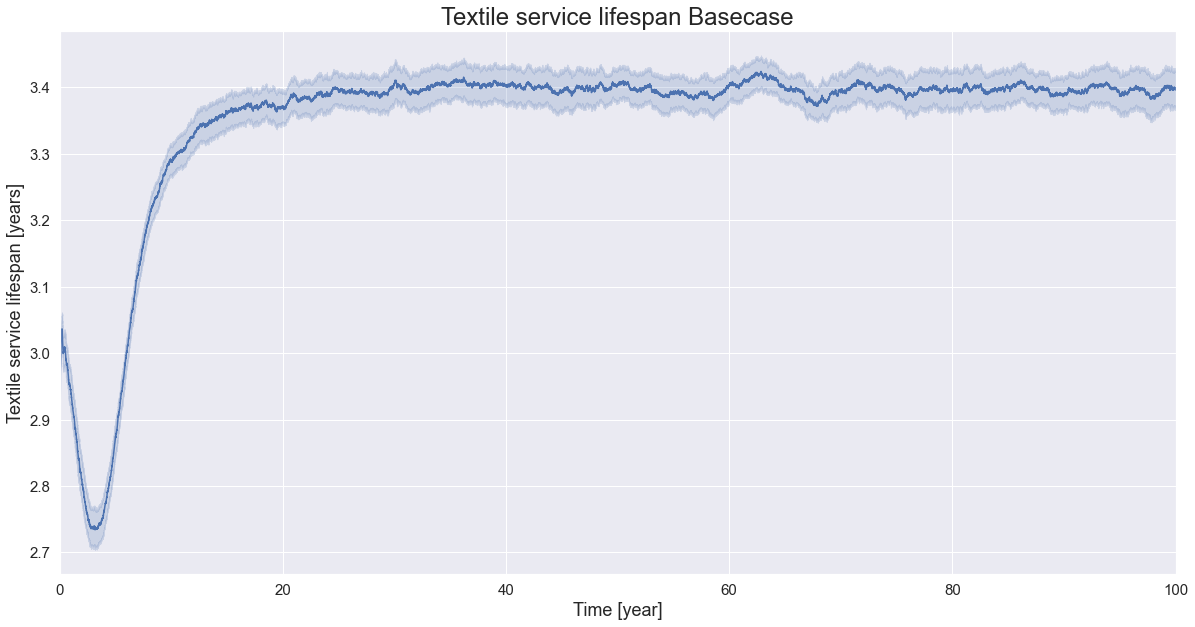

In [31]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'service-lifespan', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Textile service lifespan [years]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("Textile service lifespan Basecase", fontsize = 24)

Text(0.5, 1.0, 'New textile consumption Basecase')

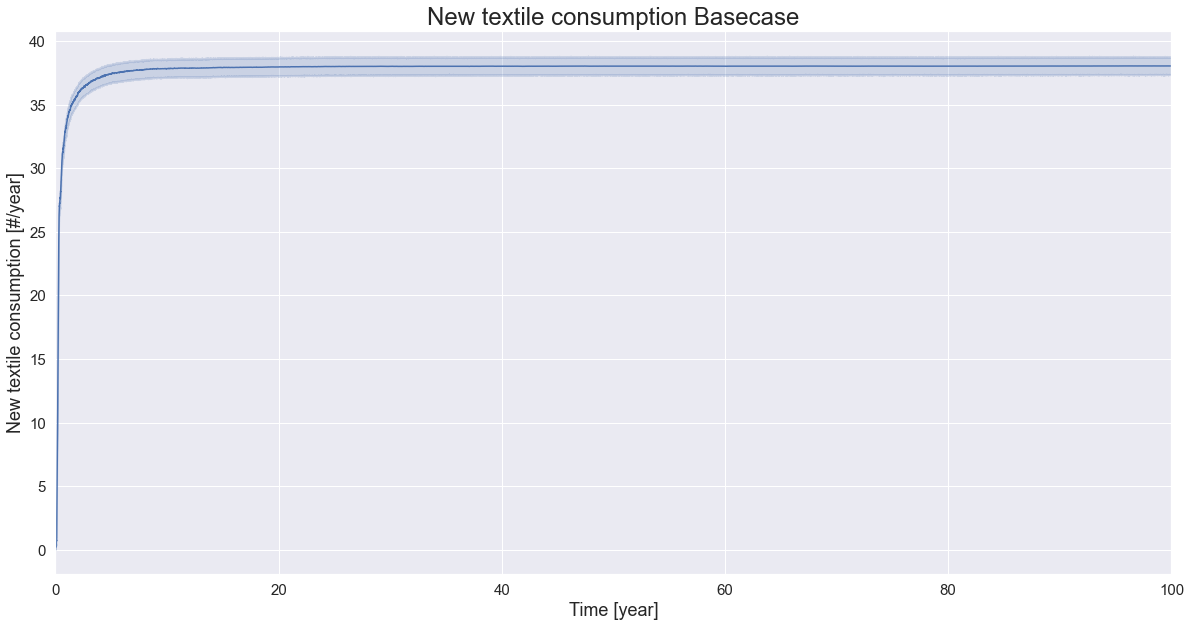

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'new-consumption', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("New textile consumption Basecase", fontsize = 24)

Text(0.5, 1.0, 'New textile consumption Basecase')

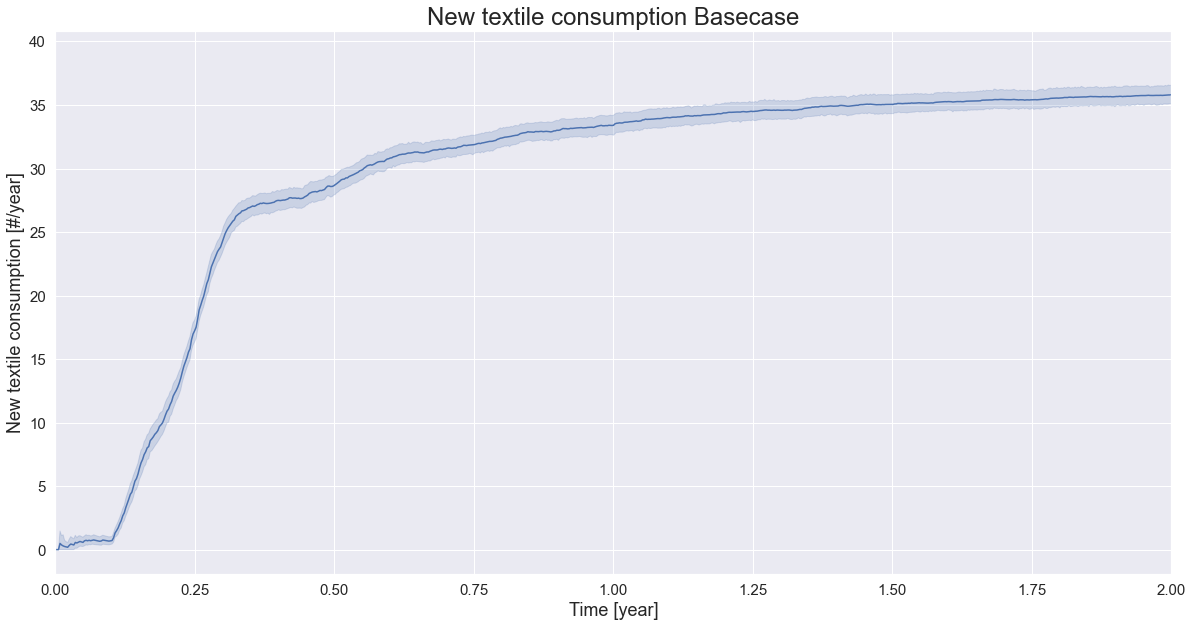

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'new-consumption', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2)
plt.title("New textile consumption Basecase", fontsize = 24)

Text(0.5, 1.0, 'Average number of owners Basecase')

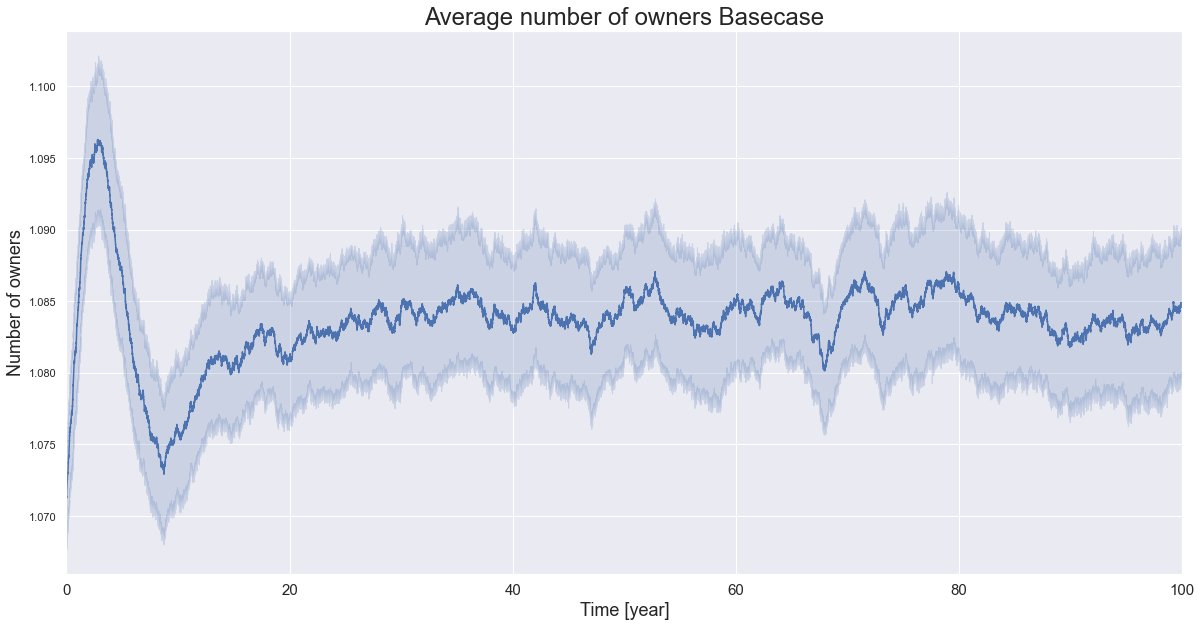

In [33]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'owners', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of owners", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(1.06,1.12)
plt.title("Average number of owners Basecase", fontsize = 24)

Text(0.5, 1.0, 'Number of textile wears Basecase')

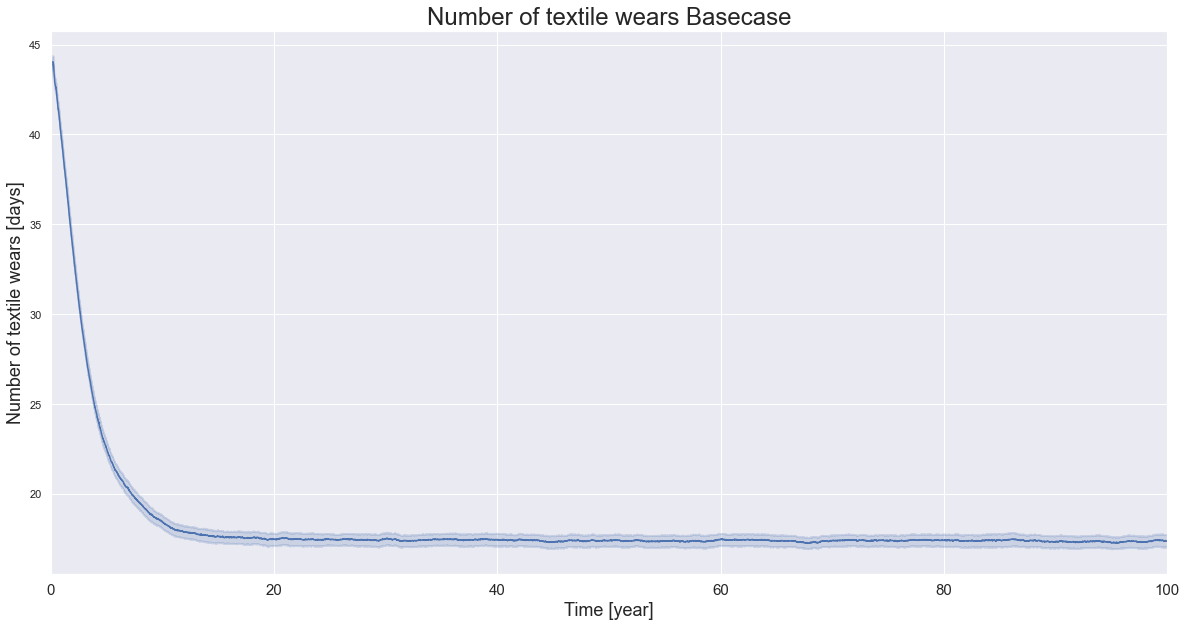

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'wears', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of textile wears [days]", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(1.06,1.12)
plt.title("Number of textile wears Basecase", fontsize = 24)

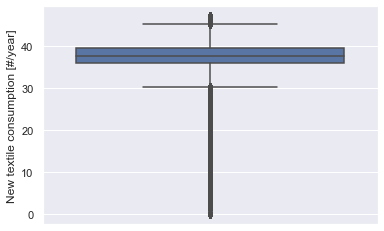

In [39]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecasenormal['new-consumption'])
ax.set_ylabel("New textile consumption [#/year]")
plt.show()

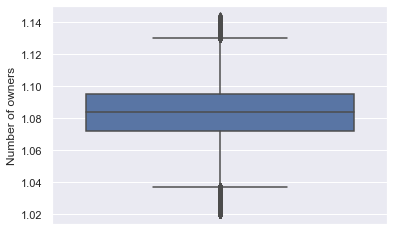

In [42]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecasenormal['owners'])
ax.set_ylabel("Number of owners")
plt.show()

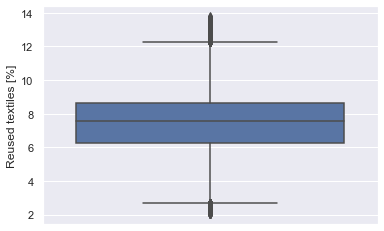

In [72]:
sns.set_theme(style="darkgrid")
plt.figure(figsize(20, 10))
ax = sns.boxplot(y=Basecasenormal['reused-textiles-percentage'])
ax.set_ylabel("Reused textiles [%]")
plt.show()

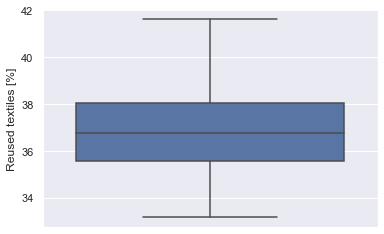

In [49]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=myDataframe['new-consumption'])
ax.set_ylabel("Reused textiles [%]")
plt.show()

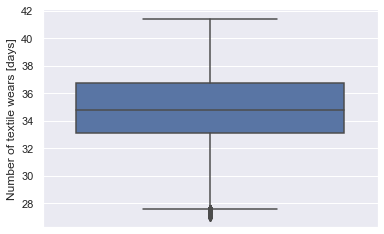

In [29]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecase['wears-1'])
ax.set_ylabel("Number of textile wears [days]")
plt.show()

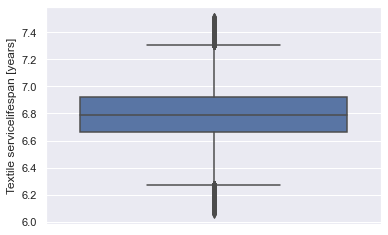

In [30]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecase['service-lifespan-1'])
ax.set_ylabel("Textile servicelifespan [years]")
plt.show()